In [213]:
# convert in python script by: jupyter nbconvert --to script Visu_discrete.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

import os.path
from os import path
import yaml

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

os.chdir('../output')

print_interactive = True
variables_to_display="all"

# for reading arguments on command line (use as a script possibly called from the program)
import sys
import re
print(sys.argv[0])
nb_arguments=len(sys.argv)
if (nb_arguments > 1):
    for i in range(1,nb_arguments):
        print(sys.argv[i])
        if re.match("--interactive=*",sys.argv[i]):
            print_interactive = int((sys.argv[i]).split( "=", 1 )[1])
        if re.match("--printvar=*",sys.argv[i]):
            variables_to_display= (sys.argv[i]).split( "=", 1 )[1]
            


if (path.isfile('sumup.yaml')):
    with open('sumup.yaml','r') as data_loaded:
        summary = yaml.safe_load(data_loaded)
        sysdim = summary["sysdim"] #int(summary["sysdim"])
        systype = summary["systype"]
        #print("summary=")
        #print(summary)
        #print(summary["systype"]==2)
        
# reading sample file
if (path.isfile('samplesreachset.yaml')):
    with open('samplesreachset.yaml','r') as samples:
        data_loaded = yaml.safe_load(samples)
        samples = data_loaded["samples"]
        sample_tn = [sample['tn'] for sample in samples]
        sample_z = []
        for i in range(sysdim):
            sample_z.append([sample["sample"][i] for sample in samples])
            
# reading approx file
# make sure this works also when several subdivision (the subdivisions are seperated by a whaite line I believe, see how t behaves?)
if (path.isfile('approxreachset.yaml')):
    with open('approxreachset.yaml','r') as approx:
        data_loaded = yaml.safe_load(approx)
        approx = data_loaded["approx"]
        approx_tn = [app["tn"] for app in approx]
        zmin_outer = []
        zmax_outer = []
        zmin_inner = []
        zmax_inner = []
        zmin_center = []
        zmax_center = []
        zmin_exact = []
        zmax_exact = []
        zmin_outer_min = []
        zmax_outer_min = []
        zmin_inner_min = []
        zmax_inner_min = []
        zmin_outer_rob = []
        zmax_outer_rob = []
        zmin_inner_rob = []
        zmax_inner_rob = []
        meanerrorouter = []
        relmeanerrorouter = []
        meanerrorinner = []
        relmeanerrorinner = []
        meanerrordiff = []
        relmeanerrordiff = []
        etaouter = []
        etainner = []
        gamma = []
        for i in range(sysdim):
            zmin_outer.append([app["outer"][2*i] for app in approx])
            zmax_outer.append([app["outer"][2*i+1] for app in approx])
            zmin_inner.append([app["inner"][2*i] for app in approx])
            zmax_inner.append([app["inner"][2*i+1] for app in approx])
            etaouter.append([app["etaouter"][i] for app in approx])
            etainner.append([app["etainner"][i] for app in approx])
            gamma.append([app["gamma"][i] for app in approx])
        
        if 'center' in approx[0]:
            for i in range(sysdim):
                zmin_center.append([app["center"][2*i+1] for app in approx])
                zmax_center.append([app["center"][2*i+1] for app in approx])
        if 'exact' in approx[0]:
            for i in range(sysdim):
                zmin_exact.append([app["exact"][2*i+1] for app in approx])
                zmax_exact.append([app["exact"][2*i+1] for app in approx])
        if 'outerminimal' in approx[0]:
            for i in range(sysdim):
                zmin_outer_min.append([app["outerminimal"][2*i+1] for app in approx])
                zmax_outer_min.append([app["outerminimal"][2*i+1] for app in approx])
        if 'innerminimal' in approx[0]:
            for i in range(sysdim):
                zmin_inner_min.append([app["innerminimal"][2*i+1] for app in approx])
                zmax_inner_min.append([app["innerminimal"][2*i+1] for app in approx])
        if 'outerrobust' in approx[0]:
            for i in range(sysdim):
                zmin_outer_rob.append([app["outerrobust"][2*i+1] for app in approx])
                zmax_outer_rob.append([app["outerrobust"][2*i+1] for app in approx])
        if 'innerrobust' in approx[0]:
            for i in range(sysdim):
                zmin_inner_rob.append([app["innerrobust"][2*i+1] for app in approx])
                zmax_inner_rob.append([app["innerrobust"][2*i+1] for app in approx])
        if 'meanerrorouter' in approx[0]:
            for i in range(sysdim):
                meanerrorouter.append([app["meanerrorouter"][2*i+1] for app in approx])
                relmeanerrorouter.append([app["relmeanerrorouter"][2*i+1] for app in approx])
                meanerrorinner.append([app["meanerroinner"][2*i+1] for app in approx])
                relmeanerrorinner.append([app["relmeanerrorinner"][2*i+1] for app in approx])
        if 'meanerrordiff' in approx[0]:
            for i in range(sysdim):
                meanerrordiff.append([app["meanerrordiff"][2*i+1] for app in approx])
                relmeanerrordiff.append([app["relmeanerrordiff"][2*i+1] for app in approx])
            
            
        inner2d_maxbox = []
        inner2d_maxskew = []
        outer2d_maxskew = []
        inner2d_minbox = []
        inner2d_robbox = []
        inner2d = [app['inner2d'] for app in approx]
        if 'maxsbox' in inner2d[0][0]:
            inner2d_maxsbox = np.zeros((len(approx_tn),sysdim, sysdim, 4), float)
        if 'maxskew' in inner2d[0][0]:
            inner2d_maxskew = np.zeros((len(approx_tn),sysdim, sysdim, 8), float)
        if 'minbox' in inner2d[0][0]:
            inner2d_minbox = np.zeros((len(approx_tn),sysdim, sysdim, 4), float)
        if 'minskew' in inner2d[0][0]:
            inner2d_minskew = np.zeros((len(approx_tn),sysdim, sysdim, 8), float)
        if 'robbox'  in inner2d[0][0]:
            inner2d_robbox  = np.zeros((len(approx_tn),sysdim, sysdim, 4), float)
        if 'robskew'  in inner2d[0][0]:
            inner2d_robskew = np.zeros((len(approx_tn),sysdim, sysdim, 8), float) 
            
        no_iter = 0
        for iter in inner2d:
            for tuple in iter:
                x1 = int(tuple['x1'])
                x2 = int(tuple['x2'])
                if 'maxbox' in tuple:
                    inner2d_maxbox[no_iter][x1][x2]=tuple['maxbox']
                # plutot changer le test ci-dessous pour recuperer l'info de skew ou pas
                if 'maxskew' in tuple:
                    inner2d_maxskew[no_iter][x1][x2]=tuple['maxskew']
                if 'minbox' in tuple:
                    inner2d_minbox[no_iter][x1][x2]=tuple['minbox']
                    inner2d_minskew[no_iter][x1][x2]=tuple['minskew']
                if 'robbox' in tuple:
                    inner2d_robbox[no_iter][x1][x2]=tuple['robbox']
                    inner2d_robskew[no_iter][x1][x2]=tuple['robskew']
            no_iter = no_iter+1
        
        if (int(sysdim) > 2 and 'inner3d' in approx[0]):
            inner3d = [app['inner3d'] for app in approx]
            inner3d_maxbox = np.zeros((len(approx_tn),sysdim,sysdim, sysdim, 6), float)
            inner3d_minbox = []
            inner3d_robbox = []
            if 'minbox' in inner3d[0][0]:
                inner3d_minbox = np.zeros((len(approx_tn),sysdim,sysdim, sysdim, 6), float)
            if 'robbox' in inner3d[0][0]:
                inner3d_robbox = np.zeros((len(approx_tn),sysdim,sysdim, sysdim, 6), float)
            
            no_iter = 0
            for iter in inner3d:
                for tuple in iter:
                    x1 = int(tuple['x1'])
                    x2 = int(tuple['x2'])
                    x3 = int(tuple['x3'])
                    inner3d_maxbox[no_iter][x1][x2][x3]=tuple['maxbox']
                    if 'minbox' in tuple:
                        inner3d_minbox[no_iter][x1][x2][x3]=tuple['minbox']
                    if 'robbox' in tuple:
                        inner3d_robbox[no_iter][x1][x2][x3]=tuple['robbox']
                no_iter = no_iter+1

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py
-f
/Users/sylvie/Library/Jupyter/runtime/kernel-cf36e4fb-6827-47d4-8010-a27fc6d8e15f.json


In [214]:
width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

def print_discrete_xy(no_varx,no_vary,sample,approx):
    
    fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    plt.grid(True,which="both", linestyle='--')
    
    if (sample):
        plt.scatter(sample_z[no_varx],sample_z[no_vary],c='purple',alpha=1.,s=1.,label='estimated reachable states')
    
    if (approx):
        xi = np.zeros((8), float)
        # print maximal outer approximation - if only boxes we print boxes otherwise we print skew boxes
        if len(outer2d_maxskew) == 0:
            for xo1,xo2,yo1,yo2 in zip(zmin_outer[no_varx],zmax_outer[no_varx],zmin_outer[no_vary],zmax_outer[no_vary]):
                car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1,color='green', ec='black', linewidth=2, alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
            car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='over-approximation', color='green', ec='black', linewidth=2, alpha=0.1,zorder=1)
            ax.add_patch(car_fig)
        else:
            for no_iter in range(len(outer2d_maxskew)):
            # maximal skewed box outer-approximation
                for i in range(8):
                    xi[i] = outer2d_maxskew[no_iter][no_varx][no_vary][i]
                car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='green', ec='black', linewidth=2,alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
            if (len(outer2d_maxbox) > 0):
                car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='green', ec='black', linewidth=2,alpha=0.1,zorder=1)
                ax.add_patch(car_fig)
                
        for no_iter in range(len(inner2d_maxbox)):
            # maximal box inner-approximation
            for i in range(4):
                xi[i] = inner2d_maxbox[no_iter][no_varx][no_vary][i]
            car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], label='under-approximation', color='orange',alpha=0.5,zorder=2)
            ax.add_patch(car_fig)
        if (len(inner2d_maxbox) > 0):
            car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], label='under-approximation', color='orange',alpha=0.5,zorder=2)
            ax.add_patch(car_fig)
         
        for no_iter in range(len(inner2d_maxskew)):
            # maximal skewed box inner-approximation
            for i in range(8):
                xi[i] = inner2d_maxskew[no_iter][no_varx][no_vary][i]
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='orange',alpha=0.5,zorder=2)
            ax.add_patch(car_fig)
        if (len(inner2d_maxskew) > 0):
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], label='under-approximation', color='orange',alpha=0.5,zorder=2)
            ax.add_patch(car_fig)
        
        for no_iter in range(len(inner2d_minbox)):    
            # minimal box inner-approximation
            for i in range(4):
                xi[i] = inner2d_minbox[no_iter][no_varx][no_vary][i]
            car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], color='red',alpha=0.5,zorder=4)
            ax.add_patch(car_fig)
            
            # minimal skewed box inner-approximation
            for i in range(8):
                xi[i] = inner2d_minskew[no_iter][no_varx][no_vary][i]
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='red',alpha=0.5,zorder=4)
            ax.add_patch(car_fig)
            
        for no_iter in range(len(inner2d_robbox)):    
            # robust box inner-approximation
            for i in range(4):
                xi[i] = inner2d_robbox[no_iter][no_varx][no_vary][i]
            car_fig = Rectangle([xi[0],xi[2]],xi[1]-xi[0],xi[3]-xi[2], color='yellow',alpha=0.5,zorder=3)
            ax.add_patch(car_fig)
            
            # robust skewed box inner-approximation
            for i in range(8):
                xi[i] = inner2d_robskew[no_iter][no_varx][no_vary][i]
            car_fig = Polygon([(xi[0],xi[1]), (xi[2],xi[3]), (xi[4],xi[5]), (xi[6],xi[7])], color='yellow',alpha=0.5,zorder=3)
            ax.add_patch(car_fig)         
        
    ax.autoscale()
    varx = 'x'+str(no_varx+1)
    vary = 'x'+str(no_vary+1)
    ax.set_xlabel(varx,fontsize="x-large")
    ax.set_ylabel(vary,fontsize="x-large")
        
    plt.legend(fontsize="x-large",loc='lower right')
    if (sample and approx):            
        f_output = 'sample_approx' + varx + vary
    elif (sample):
        f_output = 'sample' + varx + vary
    else:
        f_output = varx + vary
    plt.savefig(f_output)
    if (print_interactive):
        plt.show() 
    plt.close()

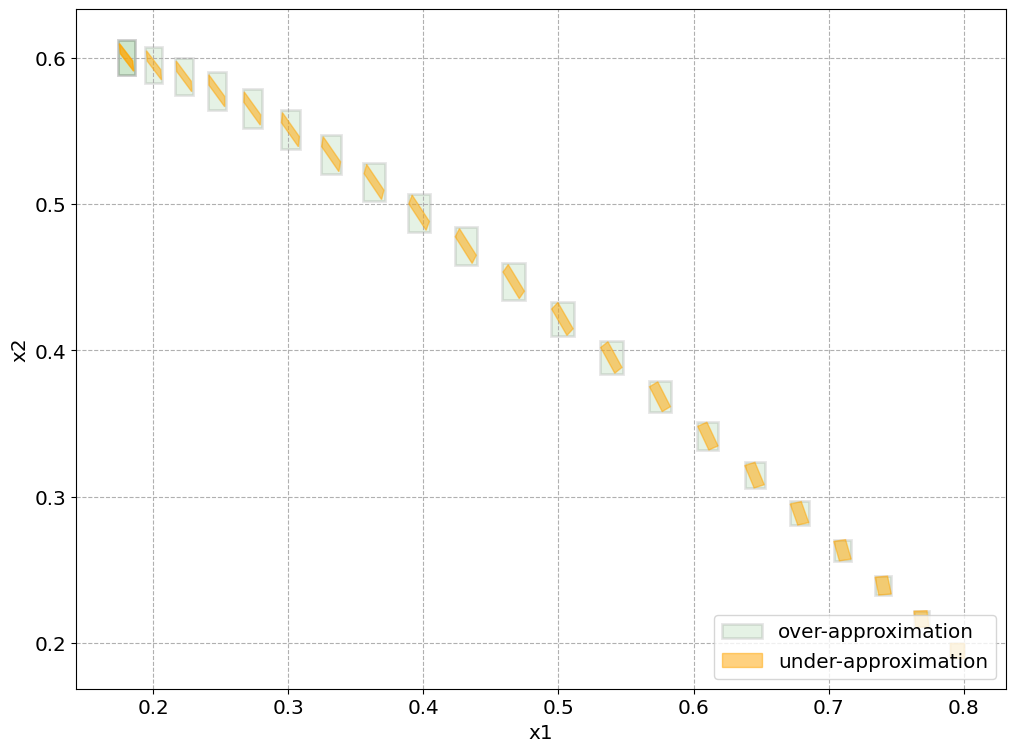

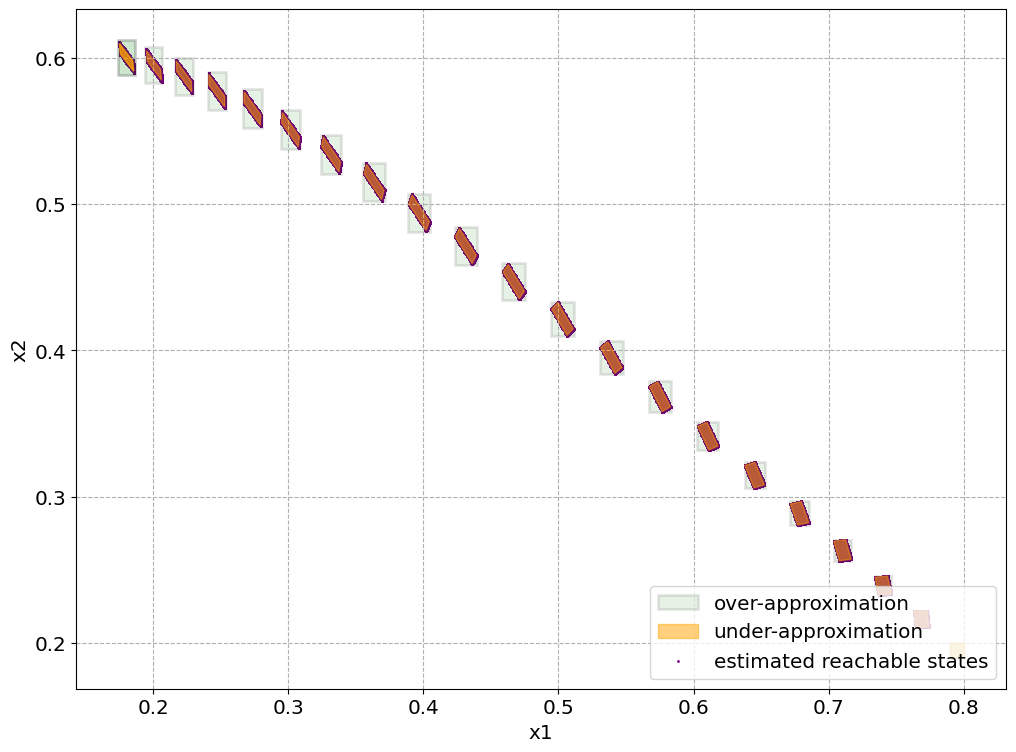

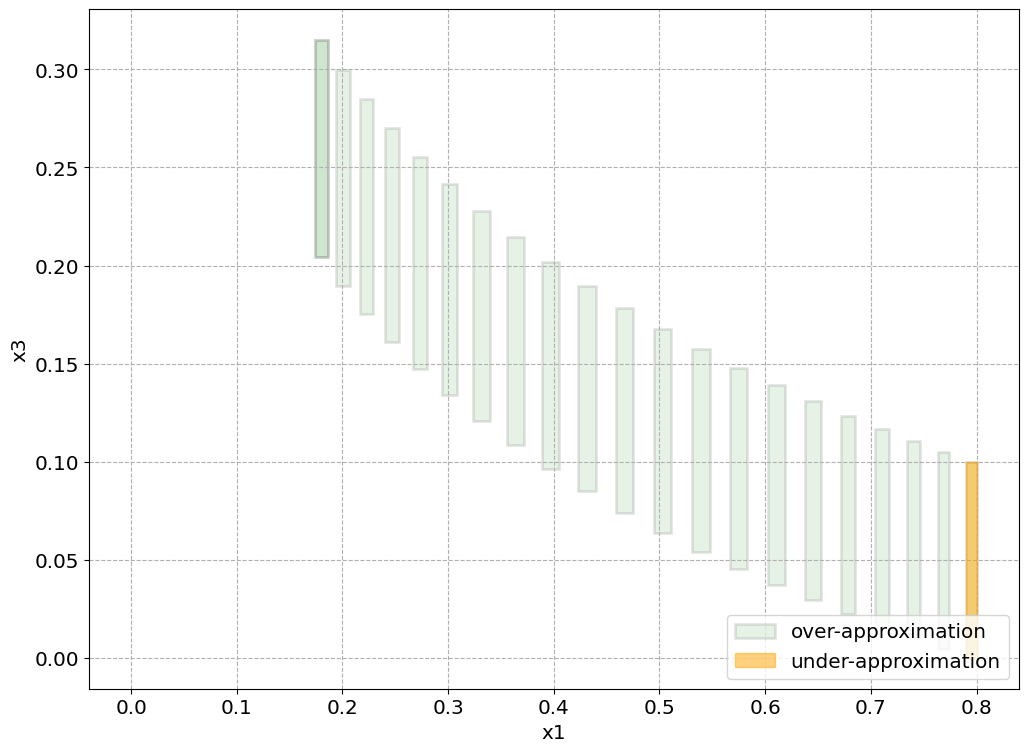

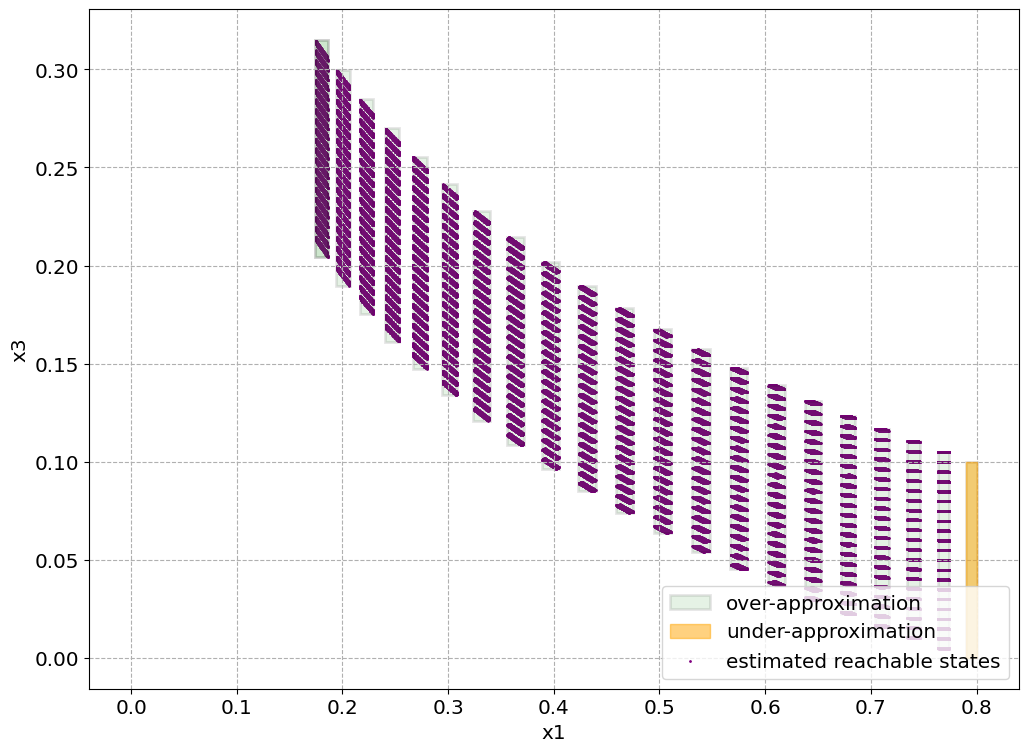

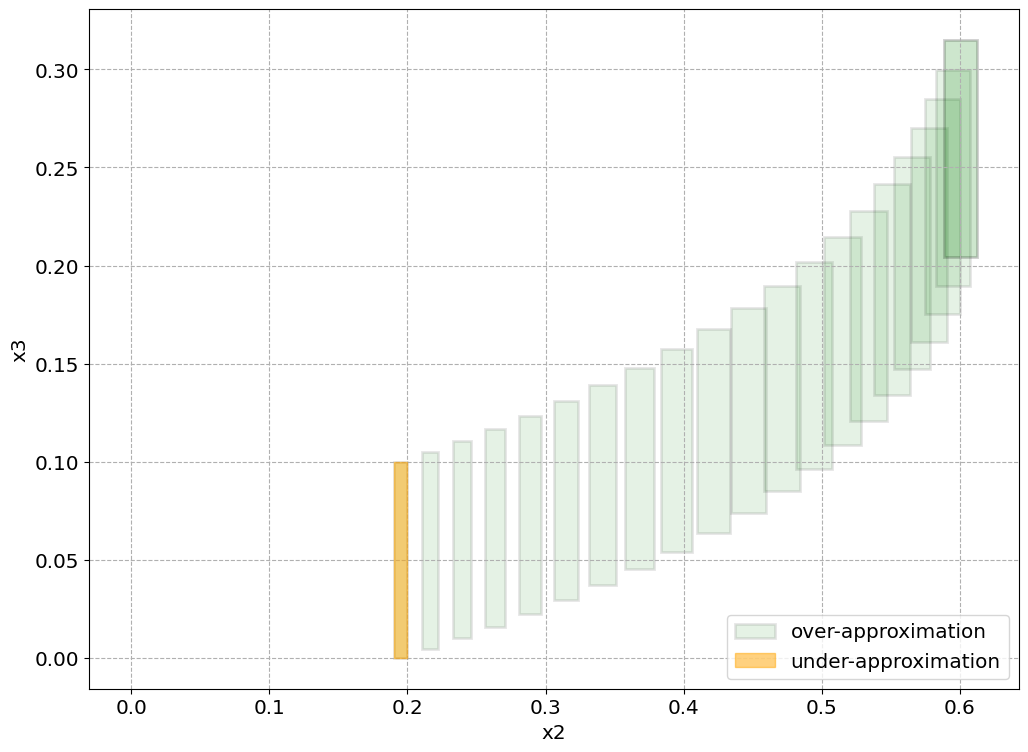

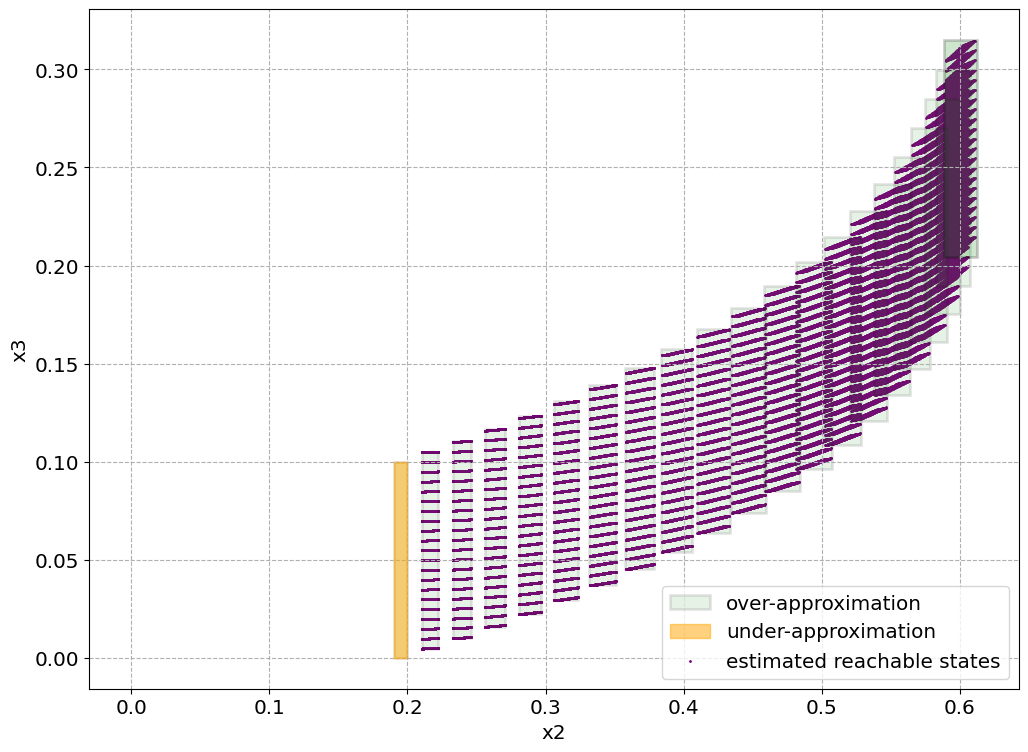

In [215]:
# print joint ranges and sampled joint range of variables to display
for vary in range(sysdim):
    vary_nb = '-' + str(vary+1) + '-'
    for varx in range(vary):
        varx_nb = '-' + str(varx+1) + '-'
        if (re.match(varx_nb,variables_to_display) and re.match(vary_nb,variables_to_display)) or re.match("all",variables_to_display):
            #print_discrete_xy(varx,vary,True,False) # sample and not approx
            print_discrete_xy(varx,vary,False,True) # not sample and approx
            print_discrete_xy(varx,vary,True,True)  # sample and approx

In [216]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as M3
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.ticker as mticker
#%matplotlib inline

def print3d_discrete_xy(varx,vary,print_interactive):
    fxy_inner = varx + vary + 'inner_joint.out'
    fxy_skewed_inner = varx + vary + 'skinner_joint.out'
    fxy_skewed_outer = varx + vary + 'skouter_joint.out'
    fx_outer2 = varx + 'outer.out'
    fy_outer2 = vary + 'outer.out'
    fx_inner = varx + 'inner.out'
    fy_inner = vary + 'inner.out'
    if (path.isfile(fx_outer2) and path.isfile(fy_outer2)):
        #fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
        fig = plt.figure()
       # ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax = fig.add_subplot(111, projection='3d') #ax = fig.gca(projection='3d') ##Axes3D(fig) #fig.gca(projection='3d')
        plt.grid(True,which="both", linestyle='--')
          
        # rectangles    
        if (not path.isfile(fxy_skewed_outer)):
            with open(fx_outer2, 'r') as x_outer2, open(fy_outer2, 'r') as y_outer2:
                linesx_outer2 = x_outer2.readlines()
                t1_outer = [float(line.split()[0]) for line in linesx_outer2]
                xmin_outer2 = [float(line.split()[1]) for line in linesx_outer2]
                xmax_outer2 = [float(line.split()[2]) for line in linesx_outer2]
                linesy_outer2 = y_outer2.readlines()
                ymin_outer2 = [float(line.split()[1]) for line in linesy_outer2]
                ymax_outer2 = [float(line.split()[2]) for line in linesy_outer2]

                for t1,xo1,xo2,yo1,yo2 in zip(t1_outer,xmin_outer2,xmax_outer2,ymin_outer2,ymax_outer2):
                    Z = np.array([[xo1,t1,yo1], [xo2,t1,yo1], [xo2,t1,yo2], [xo1,t1,yo2]]) 
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='g', linewidths=2, edgecolors='g', label='maximal inner-approximation', alpha=.1))
         
        if (path.isfile(fxy_inner) and os.stat(fxy_inner).st_size != 0 ):
            with open(fxy_inner, 'r') as xy_inner:
                linesxy_inner = xy_inner.readlines()
                t1_inner = [float(line.split()[0]) for line in linesxy_inner]
                xmin_inner = [float(line.split()[1]) for line in linesxy_inner]
                xmax_inner = [float(line.split()[2]) for line in linesxy_inner]
                ymin_inner = [float(line.split()[3]) for line in linesxy_inner]
                ymax_inner = [float(line.split()[4]) for line in linesxy_inner]

                for t1,xi1,xi2,yi1,yi2 in zip(t1_inner,xmin_inner,xmax_inner,ymin_inner,ymax_inner):
                    Z = np.array([[xi1,t1,yi1], [xi2,t1,yi1], [xi2,t1,yi2], [xi1,t1,yi2]]) 
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=2, linestyle='--', edgecolors='b', label='maximal inner-approximation', alpha=.3))
         
        # skew box
        if (path.isfile(fxy_skewed_outer)):
            with open(fxy_skewed_outer, 'r') as xy_skewed_outer:
                linesxy_skewed_outer = xy_skewed_outer.readlines()
                t1_outer = [float(line.split()[0]) for line in linesxy_skewed_outer]
                x1_outer = [float(line.split()[1]) for line in linesxy_skewed_outer]
                y1_outer = [float(line.split()[2]) for line in linesxy_skewed_outer]
                x2_outer = [float(line.split()[3]) for line in linesxy_skewed_outer]
                y2_outer = [float(line.split()[4]) for line in linesxy_skewed_outer]
                x3_outer = [float(line.split()[5]) for line in linesxy_skewed_outer]
                y3_outer = [float(line.split()[6]) for line in linesxy_skewed_outer]
                x4_outer = [float(line.split()[7]) for line in linesxy_skewed_outer]
                y4_outer = [float(line.split()[8]) for line in linesxy_skewed_outer]
                patches = []
                for t1,xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(t1_outer,x1_outer,y1_outer,x2_outer,y2_outer,x3_outer,y3_outer,x4_outer,y4_outer):
                    Z = np.array([[xi1,t1,yi1], [xi2,t1,yi2], [xi3,t1,yi3], [xi4,t1,yi4]]) 
                    # plot vertices
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    # list of sides' polygons of figure
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='g', linewidths=2, edgecolors='g', label='maximal inner-approximation', alpha=.1))
                     
        
        if (path.isfile(fxy_skewed_inner)):
            with open(fxy_skewed_inner, 'r') as xy_skewed_inner:
                linesxy_skewed_inner = xy_skewed_inner.readlines()
                t1_inner = [float(line.split()[0]) for line in linesxy_skewed_outer]
                x1_inner = [float(line.split()[1]) for line in linesxy_skewed_inner]
                y1_inner = [float(line.split()[2]) for line in linesxy_skewed_inner]
                x2_inner = [float(line.split()[3]) for line in linesxy_skewed_inner]
                y2_inner = [float(line.split()[4]) for line in linesxy_skewed_inner]
                x3_inner = [float(line.split()[5]) for line in linesxy_skewed_inner]
                y3_inner = [float(line.split()[6]) for line in linesxy_skewed_inner]
                x4_inner = [float(line.split()[7]) for line in linesxy_skewed_inner]
                y4_inner = [float(line.split()[8]) for line in linesxy_skewed_inner]
                
                for t1,xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(t1_inner,x1_inner,y1_inner,x2_inner,y2_inner,x3_inner,y3_inner,x4_inner,y4_inner):
                    Z = np.array([[xi1,t1,yi1], [xi2,t1,yi2], [xi3,t1,yi3], [xi4,t1,yi4]]) 
                    # plot vertices
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    # list of sides' polygons of figure
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=2, linestyle='--', edgecolors='b', label='maximal inner-approximation', alpha=.3))
                  
        if (path.isfile('xi.out')):
            with open('xi.out','r') as xi:
                lines_xi = xi.readlines()
                t = [float(line.split()[0]) for line in lines_xi]
                z1 = [float(line.split()[1]) for line in lines_xi]
                z2 = [float(line.split()[2]) for line in lines_xi]
       #         ax.scatter3D(z1,t,z2,c='purple',alpha=1.,s=1.,label='estimated reachable states')
        
        
        ax.autoscale()
        ax.set_xlabel(varx,fontsize="x-large")
        ax.set_zlabel(vary,fontsize="x-large")
        ax.set_ylabel('step',fontsize="x-large")
        ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
        ax.zaxis.set_major_locator(mticker.MaxNLocator(5))
       # ax.set_zlim3d(0, 25)
     #   plt.legend(fontsize="x-large",loc='center')
    #    plt.legend(fontsize="x-large",loc='lower right')
        f_output= varx + vary + 'time'
        plt.savefig(f_output)

        if (print_interactive):
            plt.show() 
        plt.close()


    
#print3d_discrete_xy("x1","x2",print_interactive)

In [217]:



fig = plt.figure()
for f_outer,f_inner in zip(filenames_outer, filenames_inner):
    variable = f_outer.rsplit( "outer", 1 )[ 0 ]  # get variable name out of file names
    variable_nb = '-' + variable.split( "x", 1 )[1] + '-'
    with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
        lines_outer = x_outer.readlines()
        t_outer = [float(line.split()[0]) for line in lines_outer]
        xmin_outer = [float(line.split()[1]) for line in lines_outer]
        xmax_outer = [float(line.split()[2]) for line in lines_outer]
        lines_inner = x_inner.readlines()
        t_inner = [float(line.split()[0]) for line in lines_inner]
        xmin_inner = [float(line.split()[1]) for line in lines_inner]
        xmax_inner = [float(line.split()[2]) for line in lines_inner]
        plt.grid(True,which="both", linestyle='--')
        if len(t_inner) > 61:
            plt.plot(t_outer , xmax_outer,  color='black')
            plt.plot(t_outer ,xmin_outer,  color='black')
        else:
            plt.plot(t_outer , xmax_outer, '.-', color='black')
            plt.plot(t_outer ,xmin_outer, '.-', color='black')
            
        plt.fill_between(t_inner,xmin_inner,xmax_inner, label=variable)
        if len(t_inner) > 61:
            plt.plot(t_inner , xmax_inner,  color='black')
            plt.plot(t_inner ,xmin_inner,  color='black')
        else:
            plt.plot(t_inner , xmax_inner, '.-', color='black')
            plt.plot(t_inner ,xmin_inner, '.-', color='black')
            
        plt.xlabel('step',fontsize="x-large")
        plt.legend()
plt.savefig('xi.png')
if (print_interactive):
    plt.show()
plt.close()



print3d_discrete_xy("x1","x2",print_interactive)

#print_discrete_xy("x1","x2",sample,approx) 



<Figure size 1080x360 with 0 Axes>

In [218]:
# if print_robust = True: print robust approx
# if print_minimal = True: print minimal approx
# print maximal approx in any case
# if only_one_graph = True, print all components on same graph
# if subplots = True, print all components on one figure using subplots
# if print_interactive = False, only print in files, otherwise do both
def print_projections(print_robust,print_minimal,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display):
    
    nbsubplots = sysdim #len(filenames_outer)
    nbcols = min(3,nbsubplots)
    nbrows = nbsubplots // nbcols
    nbrows += nbsubplots % nbcols
    position=range(1,nbsubplots+1)
    
    # larger figure if everything one one graph
    if (only_one_graph):
        width_in_inches = 10
        height_in_inches = 8
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    elif (subplots):
        width_in_inches = 12
        height_in_inches = 4*nbrows
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch) 
    else:
        fig = plt.figure()
    
    if (print_robust and print_minimal and print_maximal):
        extension = '_rob_min_max.png'
    elif (print_minimal and print_maximal):
        extension = '_min_max.png'
    elif (print_robust and print_maximal):
        extension = '_rob_max.png'
    elif (print_robust):
        extension = '_rob.png'
    elif (print_maximal and print_sample):
        extension = '_max_sample.png'
    else:
        extension = '_max.png'
    
    
    for k in range(nbsubplots):
        variable_nb = '-' + str(k+1) + '-'
        variable = 'x' + str(k+1)
        # print only if variable is in list of variables to display
        if re.match(variable_nb,variables_to_display) or re.match("all",variables_to_display):  
            if (subplots):
                ax = fig.add_subplot(nbrows,nbcols,position[k])
            if (print_maximal):
                if (subplots):
                    ax.grid(True,which="both", linestyle='--')
                    ax.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='maximal inner approx')
                    if len(approx_tn) > 61 or systype!=2:
                        ax.plot(approx_tn ,zmax_outer[k], color='black', label='maximal outer approx')
                        ax.plot(approx_tn ,zmin_outer[k], color='black')
                    else:
                        ax.plot(approx_tn ,zmax_outer[k], '.-', color='black', label='maximal outer approx')
                        ax.plot(approx_tn ,zmin_outer[k], '.-', color='black')
                    ax.title.set_text(variable)
                else:
                    plt.grid(True,which="both", linestyle='--')
                    plt.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='maximal inner approx')
                    if len(approx_tn) > 61 or systype!=2:
                        plt.plot(approx_tn , zmax_outer[k], color='black', label='maximal outer approx')
                        plt.plot(approx_tn , zmin_outer[k], color='black')
                    else:
                        plt.plot(approx_tn , zmax_outer[k], '.-', color='black', label='maximal outer approx')
                        plt.plot(approx_tn , zmin_outer[k], '.-', color='black')
               
            if (print_minimal and (len(zmin_outer_min) > 0)):
                if (subplots):
                    ax.plot(approx_tn, zmax_outer_min[k], color='blue', label='minimal outer approx')
                    ax.plot(approx_tn ,zmin_outer_min[k], color='blue')
                    ax.fill_between(approx_tn,zmin_inner_min[k],zmax_inner_min[k], label='minimal inner approx')
                    ax.title.set_text(variable)
                else:
                    plt.plot(approx_tn, zmax_outer_min[k], color='blue', label='minimal outer approx')
                    plt.plot(approx_tn ,zmin_outer_min[k], color='blue')
                    plt.fill_between(approx_tn,zmin_inner_min[k],zmax_inner_min[k], label='minimal inner approx')
            
            if (print_sample):
                if (subplots):
                    ax.scatter(sample_tn,sample_z[k],c='purple',alpha=1.,s=1.,label='estimated reachable states')
                else:
                    plt.scatter(sample_tn,sample_z[k],c='purple',alpha=1.,s=1.,label='estimated reachable states') 
                
            if (print_robust and (len(zmin_outer_rob) > 0)):
                if (subplots and print_robust):
                    ax.plot(approx_tn, zmax_outer_rob[k], color='green', label='robust outer approx')
                    ax.plot(approx_tn ,zmin_outer_rob[k], color='green')
                    ax.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='robust inner approx')
                elif (print_robust):
                    plt.plot(approx_tn, zmax_outer_rob[k], color='green', label='robust outer approx')
                    plt.plot(approx_tn ,zmin_outer_rob[k], color='green')
                    plt.fill_between(approx_tn,zmin_inner[k],zmax_inner[k], label='robust inner approx')
           
                    
            if ((not only_one_graph) and (not subplots)):
                plt.xlabel('step',fontsize="x-large")
                plt.legend() # add the legend specified by the above labels
                plt.title(variable)
                f_output = variable + extension
                plt.savefig(f_output) # save to file
                if (print_interactive):
                    plt.show() # print 
                plt.close()
                fig = plt.figure()
    
    if (only_one_graph or subplots):
        if (only_one_graph):
            plt.title("All components")
            f_output = 'xi' + extension
        if (subplots):
            f_output = 'xi_subplots' + extension
        plt.savefig(f_output)    
        if (print_interactive):
            plt.show() # print all components on same graph
        plt.close()

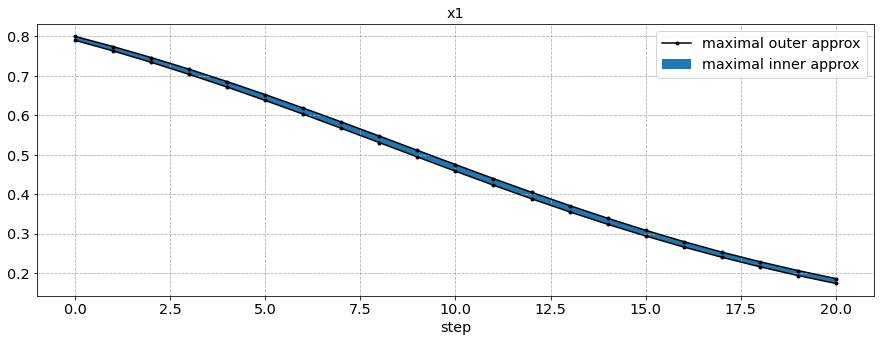

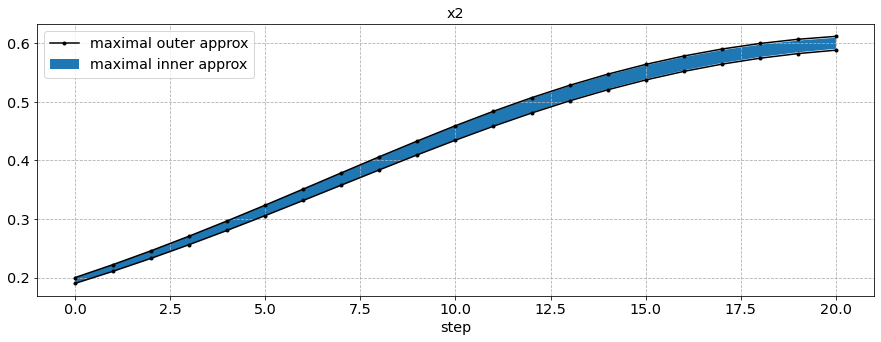

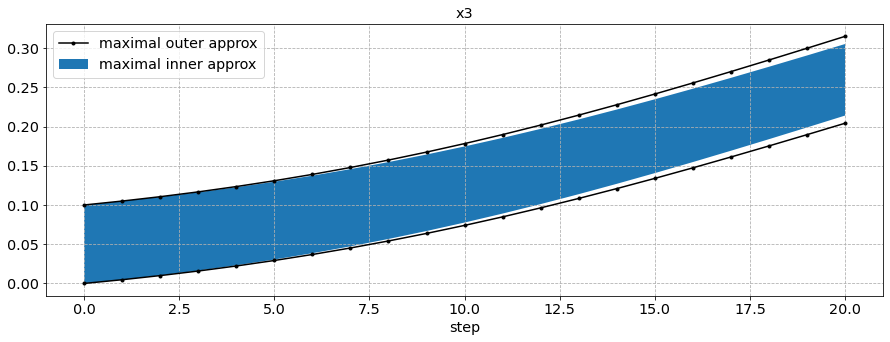

<Figure size 1080x360 with 0 Axes>

In [219]:
print_robust = True
print_minimal = False
print_maximal = True
print_sample = False
only_one_graph = False
subplots = False
#print_interactive = True
variables_to_display ="all"

print_projections(print_robust,print_minimal,print_maximal,print_sample,only_one_graph,subplots,print_interactive,variables_to_display)

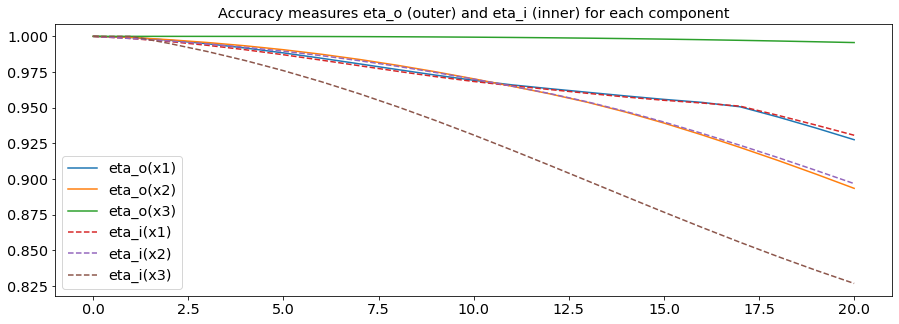

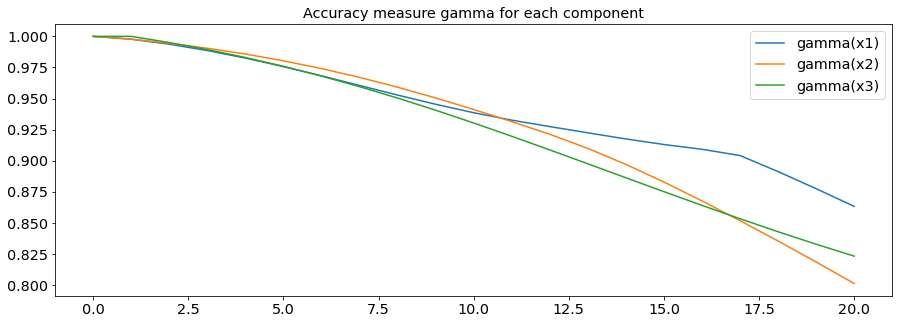

In [220]:
fig = plt.figure()
for k in range(sysdim):
    plt.plot(approx_tn , etaouter[k], label='eta_o(x'+str(k+1)+')')
for k in range(sysdim):    
    plt.plot(approx_tn , etainner[k], label='eta_i(x'+str(k+1)+')', linestyle='dashed')
plt.legend() # add the legend specified by the above labels
plt.title("Accuracy measures eta_o (outer) and eta_i (inner) for each component")
plt.savefig("eta.png") # save to file
if (print_interactive):
    plt.show() # print
plt.close()

fig = plt.figure()
for k in range(sysdim):
    plt.plot(approx_tn , gamma[k], label='gamma(x'+str(k+1)+')')
plt.legend() # add the legend specified by the above labels
plt.title("Accuracy measure gamma for each component")
plt.savefig("gamma.png") # save to file
if (print_interactive):
    plt.show() # print
plt.close()